
# Moving Average Time Series

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com
---

#  Moving Average Model

___


The moving average model is another time series process parametric family with some differences from the $AR(p)$ model., the moving average series of order q with drift c $MA(q)$ is defined as:

$$
\begin{align*}
X_{t} &= \varepsilon_t +\psi_1 \varepsilon_{t-1} +  \psi_2 \varepsilon_{t-2} + ... +  \psi_q \varepsilon_{t-q} + c \\
X_{t} &= (1 +\psi_1 B +  \psi_2 B + ... +  \psi_q B^q)\varepsilon_t + c \\
X_{t} &= \Psi_q(B)\varepsilon_t + c \\
\end{align*}
$$

Where: 
* $\psi_{i}$: It's a real coefficient.
* $\varepsilon_t$: It's and uncorrelated normal variable $N(0,\sigma^2)$ at "time" $t-i$ for $1 \leq i \leq k$

There is another useful representation for the $MA(q)$ process, replacing $\psi_i=-\theta_i$:

$$
\begin{align*}
X_{t} &= \varepsilon_t  -\theta_1 \varepsilon_{t-1} -\theta_2 \varepsilon_{t-2} - ... - \theta_q \varepsilon_{t-q}+ c \\
X_{t} &= (1-\theta_1B-\theta_2B^2- ... - \theta_q B^q)\varepsilon_t+c\\
X_{t} &= \Theta_q(B)\varepsilon_t+c\\
\end{align*}
$$


##  MA(1) model
___


The MA(1) model it's the process given by the following recursion:

$$
X_t = \psi_1 \varepsilon_{t-1} + \varepsilon_t+c
$$


#### MA(1) model stationarity conditions
The $\{Xt\}$ process is always stationary.

**Mean**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t+c \\
    E[X_t] &= E[\psi_1 \varepsilon_{t-1} + \varepsilon_t+c] \\
    E[X_t] &= \psi_1 E[\varepsilon_{t-1}] + E[\varepsilon_t]+E[c] \\
    E[X_t] &= \psi_1[0]+[0]+E[c] \\
    E[X_t] &= c \\
\end{align*}
$$

**Variance**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t+c \\
    X_t -c &= \psi_1 \varepsilon_{t-1} + \varepsilon_t \\
    Z_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t \\
    Z_t^2 &= (\psi_1 \varepsilon_{t-1} + \varepsilon_t)(\psi_1 \varepsilon_{t-1} + \varepsilon_t ) \\
    Z_t^2 &=  \psi_1^2 \varepsilon_{t-1}^2+\psi_1 \varepsilon_{t-1}\varepsilon_t+\psi_1\varepsilon_t \\
    E[Z_t^2] &=  \psi_1^2 E[\varepsilon_{t-1}^2]+\psi_1 E[\varepsilon_{t-1}\varepsilon_t]+\psi_1E[\varepsilon_t \varepsilon_{t-1}] +E[\varepsilon_t^2]\\
    E[Z_t^2] &=  \psi_1^2\sigma^2 +\psi_1[0]+\psi_1[0] +\sigma^2\\
    V[X_t] &=  (1+\psi_1^2)\sigma^2\\
    V[X_t] &=  (1+\theta_1^2)\sigma^2\\
\end{align*}
$$

Note that the mean and variance always of the param values $\sigma^2, \psi_1$ and there is not restrictionto that params. That implies stationarity for every $\psi_1$

**Example:** MA(1) stationary process instance. 

In [1]:
run tsUtils.py

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('ggplot')

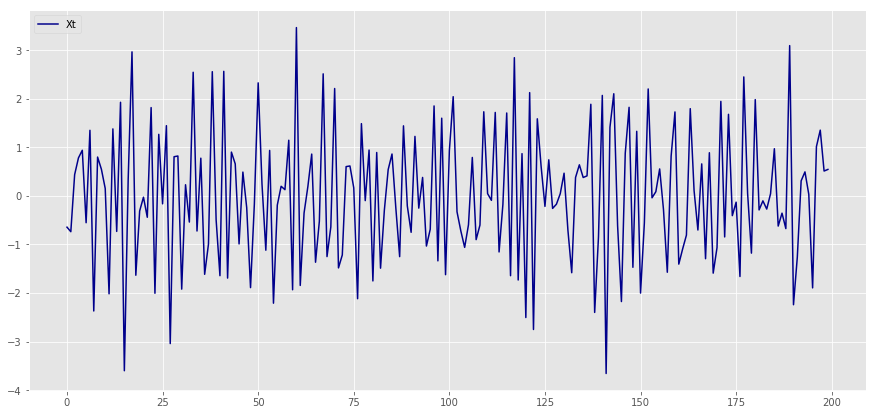

In [3]:
import statsmodels.api as sm
import numpy as np

ma = np.array([0.8])
n = 200
lags=50 
np.random.seed(5000)

Xt = sm.tsa.arma_generate_sample(np.r_[1, np.array([0, 0])],np.r_[1, -ma],n,1)
time_series_df = pd.DataFrame(Xt,columns=['Xt'])

plt.style.use('ggplot')
plotTimeSeries(time_series_df)

#### MA(1) Auto covariance and auto correlation functions.


Without loss of generality consider the centered moving average time series:

$$
X_t = \psi \varepsilon_{t-1} + \varepsilon_t
$$

**First autocovariance**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t\\
    X_tX_{t-1} &= (\psi_1 \varepsilon_{t-1} + \varepsilon_t)X_{t-1}\\
    X_tX_{t-1} &= \psi_1 \varepsilon_{t-1}X_{t-1} + \varepsilon_tX_{t-1}\\
    E[X_tX_{t-1}] &= \psi_1 E[\varepsilon_{t-1}X_{t-1}] + E[\varepsilon_tX_{t-1}]\\
    \gamma(1) &= \psi_1 E[\varepsilon_{t-1}X_{t-1}]+0\\
    &= \psi_1 E[\varepsilon_{t-1}(\varepsilon_{t-1}-\psi_1\varepsilon_{t-2})]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-1}-\psi_1\varepsilon_{t-1}\varepsilon_{t-2}]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-1}]-\psi_1 E[\varepsilon_{t-1}\varepsilon_{t-2}]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-1}]\\
    \gamma(1) &= \psi_1 \sigma^2\\
    \gamma(1) &= -\theta_1 \sigma^2\\
\end{align*}
$$

**K-th autocovariance**: for $k \geq 2$
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t\\
    X_tX_{t-k} &= (\psi_1 \varepsilon_{t-1} + \varepsilon_t)X_{t-k}\\
    X_tX_{t-k} &= \psi_1 \varepsilon_{t-1}X_{t-k} + \varepsilon_tX_{t-k}\\
    E[X_tX_{t-k}] &= \psi_1 E[\varepsilon_{t-1}X_{t-k}] + E[\varepsilon_tX_{t-k}]\\
    \gamma(k) &= \psi_1 E[\varepsilon_{t-1}X_{t-k}]+0\\
    &= \psi_1 E[\varepsilon_{t-1}(\varepsilon_{t-k}-\psi_1\varepsilon_{t-k-1})]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-k}-\psi_1\varepsilon_{t-1}\varepsilon_{t-k-1}]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-k}]-\psi_1 E[\varepsilon_{t-1}\varepsilon_{t-k-1}]\\
    &= \psi_1 (0)-0\\
    \gamma(k) &=0\\
\end{align*}
$$

**Auto covariance autocovariance**:

$$  
\gamma(k)=
\begin{cases}
\begin{align*}
(1+\theta_1^2)\sigma^2 \quad & k =0\\
-\theta_1 \sigma^2 \quad& k=1\\
0 \quad & k\geq2\\ 
\end{align*}
\end{cases}
$$

**Auto correlation autocovariance**:

$$  
\rho(k)=\frac{\gamma(k)}{\gamma(0)}=
\begin{cases}
\begin{align*}
1\quad & k =0\\
\frac{-\theta_1}{1+\theta_1^2} & k=1\\
0 \quad & k\geq2\\ 
\end{align*}
\end{cases}
$$

#### MA(1) Partial autocorrelation function.

$$
\begin{align*}
\phi_{11}&=\rho(1)\\
&=\frac{-\theta_1}{1+\theta_1^2}\\
&= \frac{-\theta_1}{1+\theta_1^2} \left(\frac{1-\theta_1^2}{1-\theta_1^2}\right) \\
&= \frac{-\theta_1^2(1-\theta_1^2)}{1-\theta_1^4}  \\
\phi_{22}&=
\frac{
    \begin{vmatrix}
        1 & \rho(1) \\
        \rho(1) & \rho(2)\\
    \end{vmatrix}
}{
    \begin{vmatrix}
        1 & \rho(1) \\
        \rho(1) & 1\\
    \end{vmatrix}
}\\
&= \frac{\rho(1)^2}{1-\rho(1)^2}\\
&= \frac{-\theta_1^2}{1+\theta_1^2+\theta_1^4} \\
&= \frac{-\theta_1^3(1-\theta_1^2)}{1-\theta_1^6}  \\
\phi_{33}&=
\frac{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(1)\\
        \rho(1) & 1 & \rho(2)\\
        \rho(2) & \rho(1)  & \rho(3)\\
    \end{vmatrix}
}{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(2)\\
        \rho(1) & 1 & \rho(1)\\
        \rho(2) & \rho(1)  & 1\\
    \end{vmatrix}
}\\
&= \frac{\rho(1)^3}{1-2\rho(1)^2}\\
&= \frac{-\theta_1^3}{1+\theta_1^2+\theta_1^4+\theta_1^6} \\
&= \frac{-\theta_1^3(1-\theta_1^2)}{1-\theta_1^8}  \\
\vdots\\
\phi_{kk}&=
\frac{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(2) & \dots & \rho(k-2)  & \rho(1)\\
        \rho(1) & 1 & \rho(1) & \dots & \rho(k-3)  & \rho(2)\\
        \vdots & \vdots & \vdots &  & \vdots & \vdots \\
        \rho(k-1) & \rho(k-2)  & \rho(k-3)  & \vdots& \rho(1) & \rho(k) \\
    \end{vmatrix}
}{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(2) & \dots & \rho(k-2)  & \rho(k-1)\\
        \rho(1) & 1 & \rho(1) & \dots & \rho(k-3)  & \rho(k-2)\\
        \vdots & \vdots & \vdots &  & \vdots & \vdots \\
        \rho(k-1) & \rho(k-2)  & \rho(k-3)  & \vdots& \rho(1) & 1 \\
    \end{vmatrix}
}\\
\phi_{kk}&= \frac{-\theta_1^k(1-\theta_1^2)}{1-\theta_1^{2(k+1)}}  \\
\end{align*}
$$

**Example:** Sample autocorrelations and partial autocorrelations using python for the MA(1) time series.

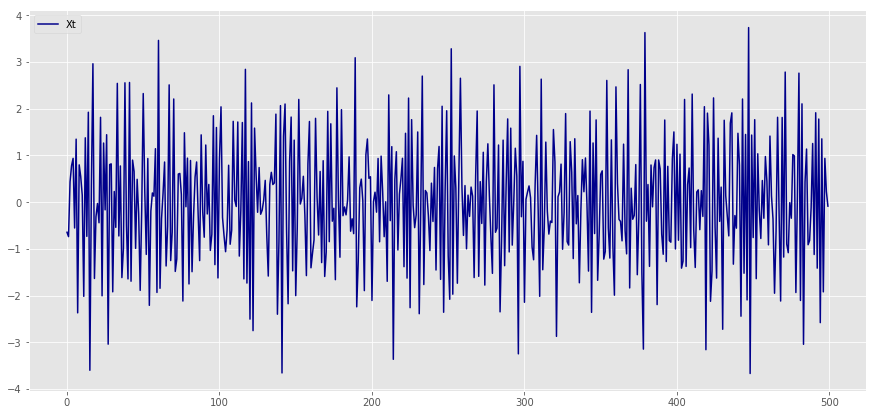

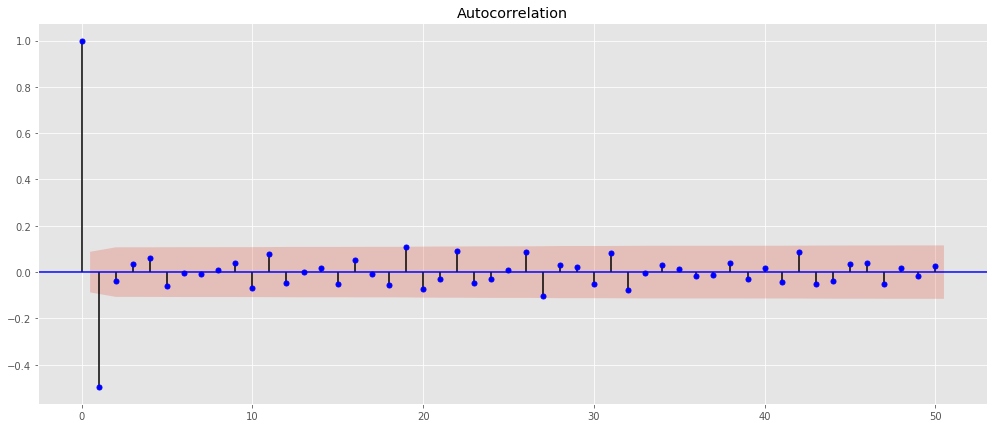

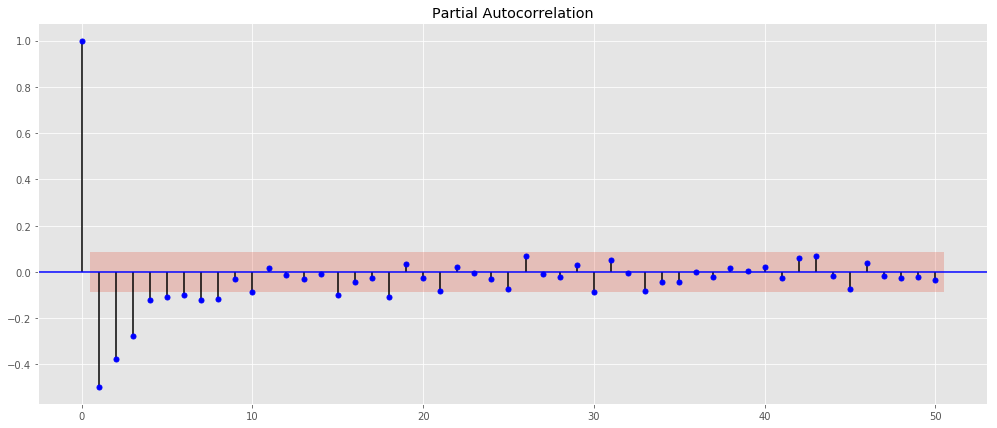

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

ma = np.array([0.8])
n = 500
lags=50
endog = 'Xt'

np.random.seed(5000)
Xt = sm.tsa.arma_generate_sample(np.r_[1, np.array([0, 0])],np.r_[1, -ma],n)
time_series_df = pd.DataFrame(Xt,columns=['Xt'])

plt.style.use('ggplot')
plotTimeSeries(time_series_df)
plt.figsize=(15,10)
fig = plot_acf(time_series_df[[endog]],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(time_series_df[[endog]],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()


####  AR(1) and MA(1) duality
___

There is an important relationship between the AR(1) and the MA(1) models called duality, this relationship consist in to express una of the processe as the other one. Consider the AR(1) process $X_t$, from the AR(1) stationarity conditions recall the expression:

$$
\begin{align*}
    X_t &= \phi_1^t X_0 +  \phi_1^{t-1} \varepsilon_1 + \phi_1^{t-2} \varepsilon_2 + \dots + \varepsilon_t\\
\end{align*}
$$

If we assume t to be large, since $|\phi_1| < 1 $ we can represent the series as a function of all the past innovations, with weights that decrease geometricall, other possibility is to assume that the series starts in the infinite past. Observe that the coefficients of the innovations are precisely the coefficients of the simple autocorrelation function.

$$
\begin{align*}
    X_t &= \phi_1^t X_0 +  \phi_1^{t-1} \varepsilon_1 + \phi_1^{t-2} \varepsilon_2 + \dots \\
    X_t &= \sum_{t=0}^{\infty} \phi_1^{j} \varepsilon_{t-j}\\
\end{align*}
$$

This representation is denoted as the infinite order moving average, $MA(\infty)$, of the process, In conclussion $AR(1) = MA(\infty)$.

For the inverse case, consider the $MA(1)$ process:


$$
\begin{align*}
    X_t &= -\theta_1 \varepsilon_{t-1} + \varepsilon_t\\
    X_{t-1} &= -\theta_1 \varepsilon_{t-2} + \varepsilon_{t-1}\\
    X_{t-2} &= -\theta_1 \varepsilon_{t-3} + \varepsilon_{t-2}\\
    \vdots\\
    X_{t-k} &= -\theta_1 \varepsilon_{t-k-1} + \varepsilon_{t-k}\\
    \varepsilon_{t-1} &= X_{t-1} + \theta_1 \varepsilon_{t-2}\\
    \varepsilon_{t-2} &= X_{t-2} + \theta_1 \varepsilon_{t-3}\\
    \vdots\\
    \varepsilon_{t-k} &= X_{t-k} + \theta_1 \varepsilon_{t-k-1}\\
    X_t &= -\theta_1 (X_{t-1} + \theta_1 \varepsilon_{t-2}) + \varepsilon_t\\
    X_t &= -\theta_1 X_{t-1} - \theta_1^2 \varepsilon_{t-2} + \varepsilon_t\\
    X_t &= -\theta_1 X_{t-1} - \theta_1^2 (X_{t-2} + \theta_1 \varepsilon_{t-3}) + \varepsilon_t\\
    X_t &= -\theta_1 X_{t-1} - \theta_1^2 X_{t-2} - \theta_1^3 \varepsilon_{t-3} + \varepsilon_t\\
    \vdots\\
    X_t &= -\theta_1 X_{t-1} - \theta_1^2 X_{t-2} - \theta_1^3 \varepsilon_{t-3} - \dots - \theta_1^k \varepsilon_{t-k-1} + \varepsilon_t\\
    \vdots\\
    X_t &= (-\theta_1 X_{t-1} - \theta_1^2 X_{t-2} - \theta_1^3 \varepsilon_{t-3} - \dots )+ \varepsilon_t\\
    X_t &= -\sum_{i=1}^{\infty} \theta^i X_{t-i}+ \varepsilon_t\\
\end{align*}
$$

Assuming that the process begins in the infinite past. This equation represents the $MA(1)$ process as $AR(\infty)$.  In conclussion $MA(1) = AR(\infty)$.


####  MA(1) invertibility.
___

For some $\theta \in \mathbb{R}$ consider the following first-order MA processes:

$$
\begin{align*}
    X_t &= \varepsilon_t-\theta_1\varepsilon_{t-1} \\
    Y_t &= \varepsilon_t-\frac{1}{\theta_1}\varepsilon_{t-1} \\
\end{align*}
$$

Notice that both processes have the same auto correlation function. So both the models have identical mean and autocovariance structures. Hence they will provide identical fits and predictions. This nonuniqueness, or lack of identifiability, is problematic since there are multiple “correct” models.

How is this issue resolved? What is done is to recall to its dual autoregressive form, if we check this situation it did not happen with the AR models.

$$
\begin{align*}
    X_t &= \varepsilon_t-\theta_1\varepsilon_{t-1} \\
    X_t &= -\sum_{i=1}^{\infty} \theta^i X_{t-i}+ \varepsilon_t\\
    \varepsilon_t &= X_t + \sum_{i=1}^{\infty} (\theta_1^i B^i) X_t\\
\end{align*}
$$

Notice that the only condition for the series to converge forces that $|\theta_1| < 1$, in that case:

$$
\begin{align*}
    \varepsilon_t &= X_t + \sum_{i=1}^{\infty} (\theta_1^i B^i) X_t\\
    \varepsilon_t &= (\theta_1^0 B^0) X_t + \sum_{i=1}^{\infty} (\theta_1^i B^i) X_t\\
    \varepsilon_t &= \left(\sum_{i=0}^{\infty} (\theta_1 B)^i\right) X_t\\
    \varepsilon_t &= \left(\frac{1}{1-\theta_1B}\right) X_t\\
    \varepsilon_t &= \left[\frac{1}{\Theta_1(B)}\right] X_t\\
\end{align*}
$$

The last respresentation of the $MA(1)$ process is valid ince $|\theta_1| < 1$, Obervse that $\frac{1}{\Theta_1(B)}$ is the inverse operator of $\Theta_1(B)$, due to that representation we said that $X_t$ is invertible. Observe that if the is invertible (restricted to the valid invertible parametral space of $\theta_1$ in this case $(-1,1)$) then there is no more than one auto correlation function asociated to $X_t$. 

In conclussion if the value of $\theta$ is larger than 1 in magnitude, then we may as well consider the second model for which coefficient associated with is $1/\theta$ whose magnitude is less than 1. Similarly if the moving average coefficient $1/\theta$ of the second model is larger than 1 in magnitude, then we may decide to use the first model for which the coefficient would be smaller than 1 in magnitude. Thus we can always choose a model whose moving average coefficient is no larger than 1 in magnitude and this is what is done in practice.

##  MA(2) model
___

The MA(2) model it's the process given by the following recursion:

$$
X_t = \psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+ \varepsilon_t+c
$$

#### MA(2) model stationarity conditions
The $\{Xt\}$ process is always stationary.

**Mean**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+ \varepsilon_t+c \\
    E[X_t] &= E[\psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+ \varepsilon_t+c] \\
    E[X_t] &= \psi_1 E[\varepsilon_{t-1}]+\psi_2 E[\varepsilon_{t-2}] + E[\varepsilon_t]+E[c] \\
    E[X_t] &= \psi_1[0]+\psi_2[0]+[0]+E[c] \\
    E[X_t] &= c \\
\end{align*}
$$

**Variance**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+ \varepsilon_t+c  \\
    X_t -c &= \psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+ \varepsilon_t \\
    Z_t &= \psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2} + \varepsilon_t\\
    Z_t^2 &= (\psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+ \varepsilon_t)(\psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+\varepsilon_t) \\
    Z_t^2 &=  \psi_1^2\varepsilon_{t-1}^2+\psi_2^2 \varepsilon_{t-2}^2+\varepsilon_{t}^2+2\psi_1\psi_2 \varepsilon_{t-1}\varepsilon_{t-2}+2\psi_1\varepsilon_{t-1}\varepsilon_{t}+2\psi_2\varepsilon_{t}\varepsilon_{t-2} \\
    E[Z_t^2] &=  \psi_1^2E[\varepsilon_{t-1}^2]+\psi_2^2 E[\varepsilon_{t-2}^2]+E[\varepsilon_{t}^2]+2\psi_1\psi_2 E[\varepsilon_{t-1}\varepsilon_{t-2}]+2\psi_1E[\varepsilon_{t-1}\varepsilon_{t}]+2\psi_2E[\varepsilon_{t}\varepsilon_{t-2}]\\
    E[Z_t^2] &=  \psi_1^2\sigma^2+\psi_2^2\sigma^2+\sigma^2++\psi_1\psi_2[0]+\psi_1[0]+\psi_2[0]\\
    V[X_t] &=  (\psi_1^2+\psi_2^2+1)\sigma^2\\
    V[X_t] &=  (\theta_1^2+\theta_2^2+1)\sigma^2\\
\end{align*}
$$

**Example:** MA(2) stationary process instance. 

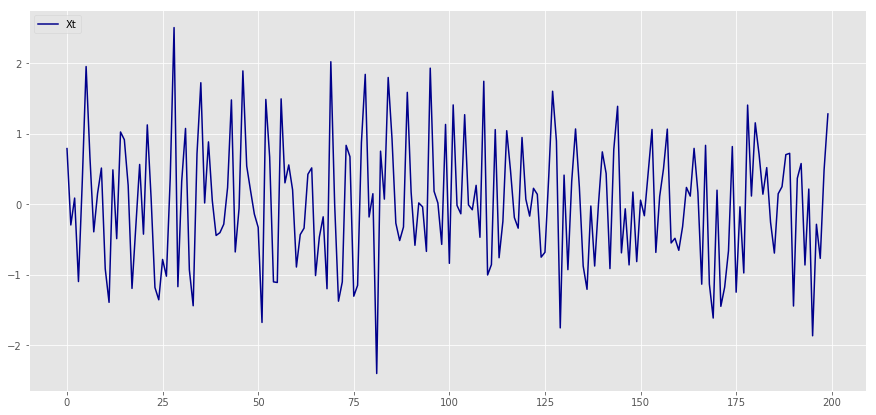

In [5]:
import statsmodels.api as sm
import numpy as np

ma = np.array([0.1,0.3])
n = 200
lags=50 

Xt = sm.tsa.arma_generate_sample(np.r_[1, np.array([0, 0])],np.r_[1, -ma],n,1)
time_series_df = pd.DataFrame(Xt,columns=['Xt'])

plt.style.use('ggplot')
plotTimeSeries(time_series_df)

#### MA(2) Auto covariance and auto correlation functions.

Without loss of generality consider the centered moving average time series:

$$
X_t = \psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t
$$

**First autocovariance**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t\\
    X_tX_{t-1} &= (\psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t)X_{t-1}\\
    X_tX_{t-1} &= \psi_1 \varepsilon_{t-1}X_{t-1} + \psi_2 \varepsilon_{t-2}X_{t-1} + \varepsilon_tX_{t-1}\\
    E[X_tX_{t-1}] &= \psi_1 E[\varepsilon_{t-1}X_{t-1}] + \psi_2 E[\varepsilon_{t-2}X_{t-1}] + E[\varepsilon_tX_{t-1}]\\
    \gamma(1) &= \psi_1 E[\varepsilon_{t-1}(\psi_1 \varepsilon_{t-2} + \psi_2 \varepsilon_{t-3} + \varepsilon_{t-1})] + \psi_2 E[\varepsilon_{t-2}(\psi_1 \varepsilon_{t-2} + \psi_2 \varepsilon_{t-3} + \varepsilon_{t-1})] + 0\\
    &= \psi_1^2 E[\varepsilon_{t-1}\varepsilon_{t-2}] + \psi_1 \psi_2 E[\varepsilon_{t-1}  \varepsilon_{t-3}] + \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-1}] + \psi_2 \psi_1 E[\varepsilon_{t-2}\varepsilon_{t-2}] + \psi_2 \psi_2 E[\varepsilon_{t-2}\varepsilon_{t-3}] + \psi_2 E[\varepsilon_{t-2}\varepsilon_{t-1}]\\
    &= \psi_1^2 (0) + \psi_1 \psi_2 (0) + \psi_1 V[\varepsilon_{t-1}] + \psi_2 \psi_1 V[\varepsilon_{t-2}] + \psi_2 \psi_2 (0) + \psi_2(0)\\
    &=\psi_1 V[\varepsilon_{t-1}] + \psi_2 \psi_1 V[\varepsilon_{t-2}]\\
    &=\psi_1 \sigma^2 + \psi_2 \psi_1 \sigma^2 \\
\gamma(1)&=(\psi_1 + \psi_2 \psi_1) \sigma^2 \\
\gamma(1)&=(\theta_2 \theta_1-\theta_1) \sigma^2 \\
\end{align*}
$$

**Second autocovariance**:

$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t\\
    X_tX_{t-2} &= (\psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t)X_{t-2}\\
    X_tX_{t-2} &= \psi_1 \varepsilon_{t-1}X_{t-2} + \psi_2 \varepsilon_{t-2}X_{t-2} + \varepsilon_tX_{t-2}\\
    E[X_tX_{t-2}] &= \psi_1 E[\varepsilon_{t-1}X_{t-2}] + \psi_2 E[\varepsilon_{t-2}X_{t-2}] + E[\varepsilon_tX_{t-2}]\\
    \gamma(2) &= \psi_1 E[\varepsilon_{t-1}(\psi_1 \varepsilon_{t-3} + \psi_2 \varepsilon_{t-4} + \varepsilon_{t-2})] + \psi_2 E[\varepsilon_{t-2}(\psi_1 \varepsilon_{t-3} + \psi_2 \varepsilon_{t-4} + \varepsilon_{t-2})]+0\\
    &= \psi_1^2 E[\varepsilon_{t-1}\varepsilon_{t-3}] + \psi_1 \psi_2 E[\varepsilon_{t-1}  \varepsilon_{t-4}] + \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-2}] + \psi_2 \psi_1 E[\varepsilon_{t-2}\varepsilon_{t-3}] + \psi_2 \psi_2 E[\varepsilon_{t-2}\varepsilon_{t-4}] + \psi_2 E[\varepsilon_{t-2}\varepsilon_{t-2}]\\
    &= \psi_1^2 (0) + \psi_1 \psi_2 (0) + \psi_1 (0) + \psi_2 \psi_1 (0) + \psi_2 \psi_2 (0) + \psi_2 V[\varepsilon_{t-2}]\\
\gamma(2)&=\psi_2 \sigma^2 \\
\gamma(2)&=-\theta_2 \sigma^2 \\
\end{align*}
$$

**K-th autocovariance**: for $k \geq 3$
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t\\
    X_tX_{t-k} &= (\psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t)X_{t-k}\\
    X_tX_{t-k} &= \psi_1 \varepsilon_{t-1}X_{t-k} + \psi_2 \varepsilon_{t-2}X_{t-k} + \varepsilon_tX_{t-k}\\
    E[X_tX_{t-k}] &= \psi_1 E[\varepsilon_{t-1}X_{t-k}] + \psi_2 E[\varepsilon_{t-2}X_{t-k}] + E[\varepsilon_tX_{t-k}]\\
    \gamma(k) &= \psi_1 E[\varepsilon_{t-1}(\psi_1 \varepsilon_{t-k-1} + \psi_2 \varepsilon_{t-k-2} + \varepsilon_{t-k})] + \psi_2 E[\varepsilon_{t-2}(\psi_1 \varepsilon_{t-k-1} + \psi_2 \varepsilon_{t-k-2} + \varepsilon_{t-k})]+0\\
    &= \psi_1^2 E[\varepsilon_{t-1}\varepsilon_{t-k-1}] + \psi_1 \psi_2 E[\varepsilon_{t-1}  \varepsilon_{t-k-2}] + \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-k}] + \psi_2 \psi_1 E[\varepsilon_{t-2}\varepsilon_{t-k-1}] + \psi_2 \psi_2 E[\varepsilon_{t-2}\varepsilon_{t-k-2}] + \psi_2 E[\varepsilon_{t-2}\varepsilon_{t-k}]\\
    &= \psi_1^2 (0) + \psi_1 \psi_2 (0) + \psi_1 (0) + \psi_2 \psi_1 (0) + \psi_2 \psi_2 (0) + \psi_2 (0)\\
    \gamma(k) &=0\\
\end{align*}
$$

**Auto covariance autocovariance**:

$$  
\gamma(k)=
\begin{cases}
\begin{align*}
(\psi_1^2+\psi_2^2+1)\sigma^2 &\quad  k =0\\
(\psi_1 + \psi_2 \psi_1) \sigma^2 &\quad  k=1\\
\psi_2 \sigma^2 \quad &\quad  k=2\\
0 \quad &\quad  k\geq 3\\ 
\end{align*}
\end{cases}
$$

$$  
\gamma(k)=
\begin{cases}
\begin{align*}
(\theta_1^2+\theta_2^2+1)\sigma^2 &\quad  k =0\\
(\theta_2 \theta_1-\theta_1) \sigma^2 &\quad  k=1\\
-\theta_2 \sigma^2 \quad &\quad  k=2\\
0 \quad &\quad  k\geq 3\\ 
\end{align*}
\end{cases}
$$

**Auto correlation autocovariance**:

$$  
\rho(k)=\frac{\gamma(k)}{\gamma(0)}=
\begin{cases}
\begin{align*}
1\quad & k =0\\
\frac{(\psi_1 + \psi_2 \psi_1)}{(\psi_1^2+\psi_2^2+1)}\quad & k=1\\
\frac{\psi_2}{(\psi_1^2+\psi_2^2+1)}\quad & k=2\\
0 \quad & k\geq 3\\ 
\end{align*}
\end{cases}
$$

$$  
\rho(k)=\frac{\gamma(k)}{\gamma(0)}=
\begin{cases}
\begin{align*}
1\quad & k =0\\
\frac{(\theta_2 \theta_1-\theta_1)}{(\theta_1^2+\theta_2^2+1)}\quad & k=1\\
\frac{-\theta_2}{(\theta_1^2+\theta_2^2+1)}\quad & k=2\\
0 \quad & k\geq 3\\ 
\end{align*}
\end{cases}
$$

#### MA(2) Partial autocorrelation function.